# EDA

This notebook is dedicated to the Exploratory Data Analysis of the Ames, Iowa Dataset.

## Problem Statement

The purpose of this analysis of housing prices in Ames, Iowa is to understand the key factors that influence the housing prices in the area and to develop a model that can accurately predict the value of a given property based on its features. This analysis will help developers better understand the local market and make informed decisions about buying, selling, or investing in properties in Ames, Iowa.

At the end of this report, I will provide recommendations based on the analysis undertaken, as determined by the the success of the model. This success will be determined by a number of statistical factors, including Root Mean Squared Error and R2 value, as they both provide a human interpretable comparison between our two data sets.

My goal is to provide the board with a model that is more accurate that the null model. This information will inform the board's direction as they aim to improve available housing for the residents of Ames.

### Imports


In [1]:
# Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
#data imports
df = pd.read_csv('../datasets/train.csv')
df_test = pd.read_csv('../datasets/test.csv')
df_test.shape

(878, 80)

### What does the data look like?


In [3]:
# What does it look like?
display(df.head(15))
#display(df.columns)

# converting heading to snakecase (train)
df.columns = df.columns.str.lower().str.replace('.', '_',regex = False)

# converting heading to snakecase (test)
df_test.columns = df_test.columns.str.lower().str.replace('.', '_',regex = False)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,9,2007,WD,135000


In [4]:
#Finding missing values
(df.isna().sum()).head(10)

id                 0
pid                0
ms subclass        0
ms zoning          0
lot frontage     330
lot area           0
street             0
alley           1911
lot shape          0
land contour       0
dtype: int64

In [5]:
(df_test.isna().sum()).head(5)

id                0
pid               0
ms subclass       0
ms zoning         0
lot frontage    160
dtype: int64

## Finding important Features

Before I begin cleaning the data, I want to know what level of cleaning will be required for each column. As I clean the dataframe, I want to focus on specific columns that correlate strongly with 'sale price' and make them ready for importation into the model.

I'll further refine this section in later scripts within this folder. My intention is to develop an initial set of features to evaluate and further tune the model after the initial evaluation.

In [6]:
# Continuous Feature correlation with 'saleprice'
cor_matrix = df.corr(numeric_only = True)
target_cor = cor_matrix['saleprice']
target_cor = target_cor[target_cor !=1].sort_values(ascending=False)
display(target_cor.head(10))

overall qual      0.800207
gr liv area       0.697038
garage area       0.650270
garage cars       0.648220
total bsmt sf     0.628925
1st flr sf        0.618486
year built        0.571849
year remod/add    0.550370
full bath         0.537969
garage yr blt     0.533922
Name: saleprice, dtype: float64

Above, I've created a list of values that are strongly correlated with saleprice and removing the values where correlation = 1.

In [7]:
#list of top correlated features
corr_list = target_cor.head(6).index
print(corr_list)

Index(['overall qual', 'gr liv area', 'garage area', 'garage cars',
       'total bsmt sf', '1st flr sf'],
      dtype='object')


### Exploratory Feature Engineering

This section will be devoted to exploring the attributes of some of the features listed above to see which features may benefit from feature engineering.

##### Are any distributions skewed? 

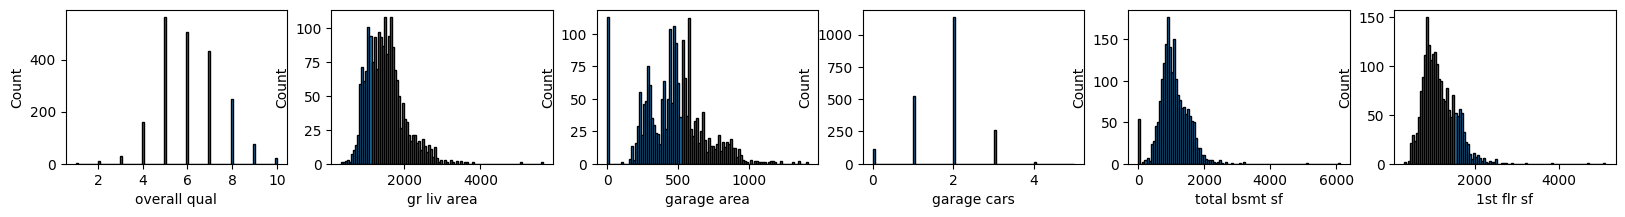

In [8]:
fig, axs = plt.subplots(1, len(corr_list), figsize=(20, 2))

# Loop over the features and plot a histogram for each one
for i, feature in enumerate(corr_list):
    axs[i].hist(df[feature], bins=100, edgecolor="black")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Count")

# Show the plot
plt.show()

Above I've created a histogram for several of the important features in our dataset (by means of correlation with sale price). Because there are several distirubtions that are oddly skewed, they would benefit from being normalized. This will be completed later in the analysis.

##### Which features could be hot encoded?

In the third notebook, I'll hot encode several features that are listed below

In [9]:
# returning only non-numeric type features
categorical_df = df.select_dtypes(exclude=[np.number])
display(categorical_df)

,ms zoning,street,alley,lot shape,land contour,utilities,lot config,land slope,neighborhood,condition 1,...,fireplace qu,garage type,garage finish,garage qual,garage cond,paved drive,pool qc,fence,misc feature,sale type
0,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,...,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
1,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,...,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
2,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD
3,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,...,NaN,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,...,NaN,Detchd,Unf,TA,TA,N,NaN,NaN,NaN,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,...,Gd,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD
2047,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,...,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD
2048,RL,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,...,TA,Detchd,Unf,Fa,Fa,Y,NaN,NaN,NaN,WD
2049,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD


In [10]:
id = df_test['id']
print(id)

0      2658
1      2718
2      2414
3      1989
4       625
       ... 
873    1662
874    1234
875    1373
876    1672
877    1939
Name: id, Length: 878, dtype: int64


# Data Dictionary

Below is a dictionary of the data that was used for this analysis

| Feature | Type | Dataset | Description |
| --- | --- | --- | --- |
| SalePrice | Numeric | Ames Housing Dataset | The property's sale price in US dollars |
| LotArea | Numeric | Ames Housing Dataset | The size of the lot in square feet |
| OverallQual | Categorical/Ordinal | Ames Housing Dataset | Overall material and finish quality of the house on a scale of 1-10, with 10 being the best |
| OverallCond | Categorical/Ordinal | Ames Housing Dataset | Overall condition rating of the house on a scale of 1-10, with 10 being the best |
| YearBuilt | Numeric | Ames Housing Dataset | The year the house was built |
| YearRemodAdd | Numeric | Ames Housing Dataset | The year the house was remodeled or had additions made |
| MasVnrArea | Numeric | Ames Housing Dataset | Masonry veneer area in square feet |
| TotalBsmtSF | Numeric | Ames Housing Dataset | Total square footage of basement area |
| 1stFlrSF | Numeric | Ames Housing Dataset | Total square footage of first floor area |
| 2ndFlrSF | Numeric | Ames Housing Dataset | Total square footage of second floor area |
| GrLivArea | Numeric | Ames Housing Dataset | Above grade (ground) living area square footage |
| FullBath | Numeric | Ames Housing Dataset | Number of full bathrooms in the house |
| HalfBath | Numeric | Ames Housing Dataset | Number of half bathrooms in the house |
| BedroomAbvGr | Numeric | Ames Housing Dataset | Number of bedrooms above ground |
| KitchenAbvGr | Numeric | Ames Housing Dataset | Number of kitchens above ground |
| TotRmsAbvGrd | Numeric | Ames Housing Dataset | Total rooms above ground, excluding bathrooms |
| Fireplaces | Numeric | Ames Housing Dataset | Number of fireplaces in the house |
| GarageCars | Numeric | Ames Housing Dataset | Size of garage in car capacity |
| GarageArea | Numeric | Ames Housing Dataset | Size of garage in square feet |
| MoSold | Categorical/Nominal | Ames Housing Dataset | Month of sale |
| YrSold | Numeric | Ames Housing Dataset | Year of sale |
| Neighborhood | Categorical/Nominal | Ames Housing Dataset | Physical locations within Ames city limits |
| MSSubClass | Categorical/Nominal | Ames Housing Dataset | The building class |
| HouseStyle | Categorical/Nominal | Ames Housing Dataset | Style of dwelling |
| ExterQual | Categorical/Ordinal | Ames Housing Dataset | Evaluates the quality of the material on the exterior of the house on a scale of Excellent, Good, Average/Typical, Fair, Poor |
| ExterCond | Categorical/Ordinal | Ames Housing Dataset | Evaluates the present condition of the material on the exterior of the house on a scale of Excellent, Good, Average/Typical, Fair, Poor |
| HeatingQC | Categorical/Ordinal | Ames Housing Dataset | Heating quality and condition |
| CentralAir | Categorical/Nominal | Ames Housing Dataset | Central air conditioning |
| Electrical | Categorical/Nominal | Ames Housing Dataset | Electrical system |
| BsmtQual | Categorical/Ordinal | Ames Housing Dataset | Evaluates the height of the basement on a scale of Excellent (100+ inches), Good (90-99 inches), Typical (80-89 inches), Fair (70-79 inches), Poor (<70 inches), No Basement |

#### Setting up exports

In [11]:
#setting up pickle to export variables
with open('pickles/corr_list.pkl', 'wb') as f:
    pickle.dump(corr_list, f)
    
with open('pickles/df.pkl', 'wb') as f:
    pickle.dump(df, f)
      
with open('pickles/df_test.pkl', 'wb') as f:
    pickle.dump(df_test, f)
    
with open('pickles/id.pkl', 'wb') as f:
    pickle.dump(id, f)
